In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


In [2]:
# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))


In [7]:
class SparseAutoencoder(models.Model):
    def __init__(self, sparsity_target=0.05, beta=1e-3):
        super(SparseAutoencoder, self).__init__()
        self.sparsity_target = sparsity_target
        self.beta = beta

        # Encoder
        self.encoder = models.Sequential([
            layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
            layers.Dense(64, activation='relu')
        ])

        # Decoder
        self.decoder = models.Sequential([
            layers.Dense(128, activation='relu'),
            layers.Dense(28 * 28, activation='sigmoid')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        self.add_loss(self.sparsity_loss(encoded))  # Add sparsity loss to the model
        return decoded

    def sparsity_loss(self, encoded):
        rho_hat = tf.reduce_mean(encoded, axis=0)
        kl_divergence = (self.sparsity_target * tf.math.log(self.sparsity_target / (rho_hat + 1e-10)) +
                         (1 - self.sparsity_target) * tf.math.log((1 - self.sparsity_target) / (1 - rho_hat + 1e-10)))
        return self.beta * tf.reduce_sum(kl_divergence)


In [8]:
# Create an instance of the SparseAutoencoder
autoencoder = SparseAutoencoder()

# Compile the model
autoencoder.compile(optimizer='adam', loss=losses.BinaryCrossentropy())


In [9]:
# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=64, validation_data=(x_test, x_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: nan - val_loss: nan
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: nan - val_loss: nan
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: nan - val_loss: nan
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: nan - val_loss: nan
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: nan - val_loss: nan
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: nan - val_loss: nan
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: nan - val_loss: nan
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: nan - val_loss: nan
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: nan - val_loss: nan
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: nan - val_loss: nan


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


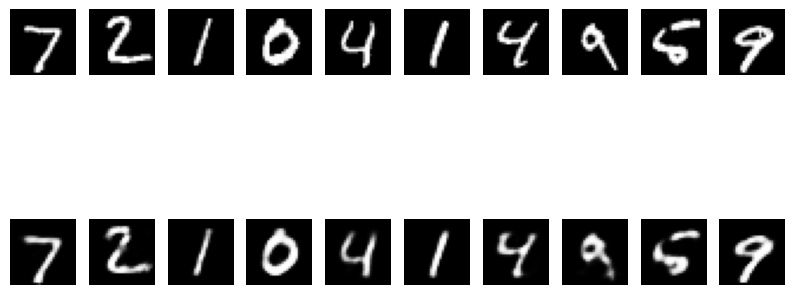

In [10]:
# Function to visualize the original and reconstructed images
def visualize_reconstruction(autoencoder, x_test):
    decoded_images = autoencoder.predict(x_test)

    plt.figure(figsize=(10, 5))
    for i in range(10):
        # Original images
        plt.subplot(2, 10, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.axis('off')

        # Reconstructed images
        plt.subplot(2, 10, i + 11)
        plt.imshow(decoded_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()

# Visualize the reconstruction results
visualize_reconstruction(autoencoder, x_test)
